# Task 2: Analysis 

## Task 2.1 : Classic and sequential A/B testing analysis


**Import** libraries for drwaing and analysis.

In [1]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom




**Import** data as csv

In [2]:
sns.set()
import warnings
warnings.filterwarnings('ignore')
path='C:/Users/chuna/Downloads/week4/AdSmartABdata.csv'
isFile = os.path.isfile(path) 
print(isFile)                           
df = pd.read_csv(path)

df 

True


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


Check all user id's are **unique**

In [3]:
df['auction_id'].value_counts().nlargest() ## all unique

9c983f15-7d49-458b-8492-33c0c01821bf    1
77a357f9-15dd-416a-8f44-429c4dd067ff    1
4667d40b-d63f-4d82-bf88-abba4632e189    1
125ca54d-1e26-41f4-bcf7-877085a4932e    1
e0187da2-1b4d-4c46-a64d-93da765e8dd2    1
Name: auction_id, dtype: int64

Group datapoints as control and exposed.Also count number of success and fail in each.

In [4]:
df_grouped = df.groupby('experiment').agg(yes=('yes', 'sum'),no=('no','sum'))

df_grouped['total']=df_grouped['yes']+df_grouped['no']
df_grouped

,yes,no,total
experiment,,,
control,264,322,586
exposed,308,349,657


This **plot** shows how many people said `yes` or `no` from each group.

[Text(0, 0.5, 'Values'),
 Text(0.5, 0, 'Values'),
 Text(0.5, 1.0, 'Bar plot of Groups')]

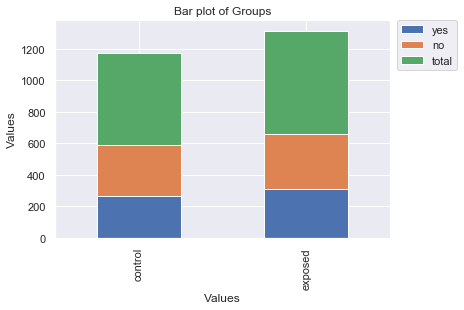

In [5]:
lp=df_grouped.plot.bar(stacked=True)
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Bar plot of Groups', xlabel='Values', ylabel='Values')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


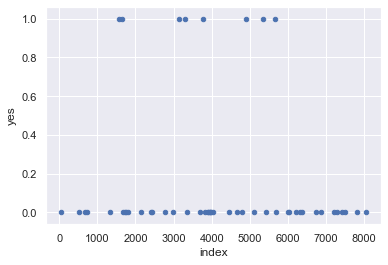

In [6]:
df.sample(50).reset_index().plot(kind='scatter', x='index', y='yes')

In [7]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [8]:
#sns.relplot(x="index", y='yes', height= 8, aspect=1, hue="browser", data=df)


In [9]:
df_control=df.loc[df['experiment'] == 'control']
df_exposed=df.loc[df['experiment'] == 'exposed']
df_control


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


In [10]:
#df_control_clean['yes'].value_counts().plot(kind='bar')

In [11]:
df_exposed_clean=df_exposed.drop(df_exposed[(df_exposed.yes == 0) & (df_exposed.no == 0)].index)
df_control_clean=df_control.drop(df_control[(df_control.yes == 0) & (df_control.no == 0)].index)
df_exposed_clean


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1
...,...,...,...,...,...,...,...,...,...
8054,ff82e341-b72c-4531-b87e-1e11dc35d3fc,exposed,2020-07-10,8,Samsung SM-G973F,6,Samsung Internet,1,0
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0


In [12]:



clicks_cont=586
clicks_exp=657
p=0.5
def get_z_score(alpha):
    return norm.ppf(alpha)

alpha=0.05
clicks_total=clicks_cont + clicks_exp

p_hat=round(clicks_cont/clicks_total,4)
sd=mt.sqrt(p*(1-p)/clicks_total)
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4722 and 0.5278 ; Is 0.4714 inside this range?


In [13]:
#sns.stripplot(x="y", data=df_control_clean, size=5)

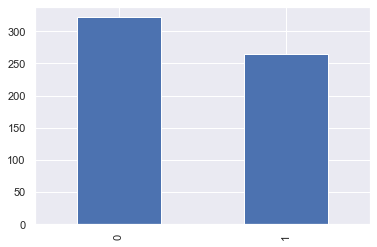

In [14]:
df_control_clean['yes'].value_counts().plot(kind='bar')

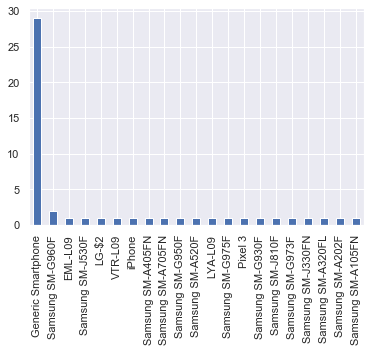

In [15]:
df_control_clean['device_make'].sample(50).value_counts().plot(kind='bar')

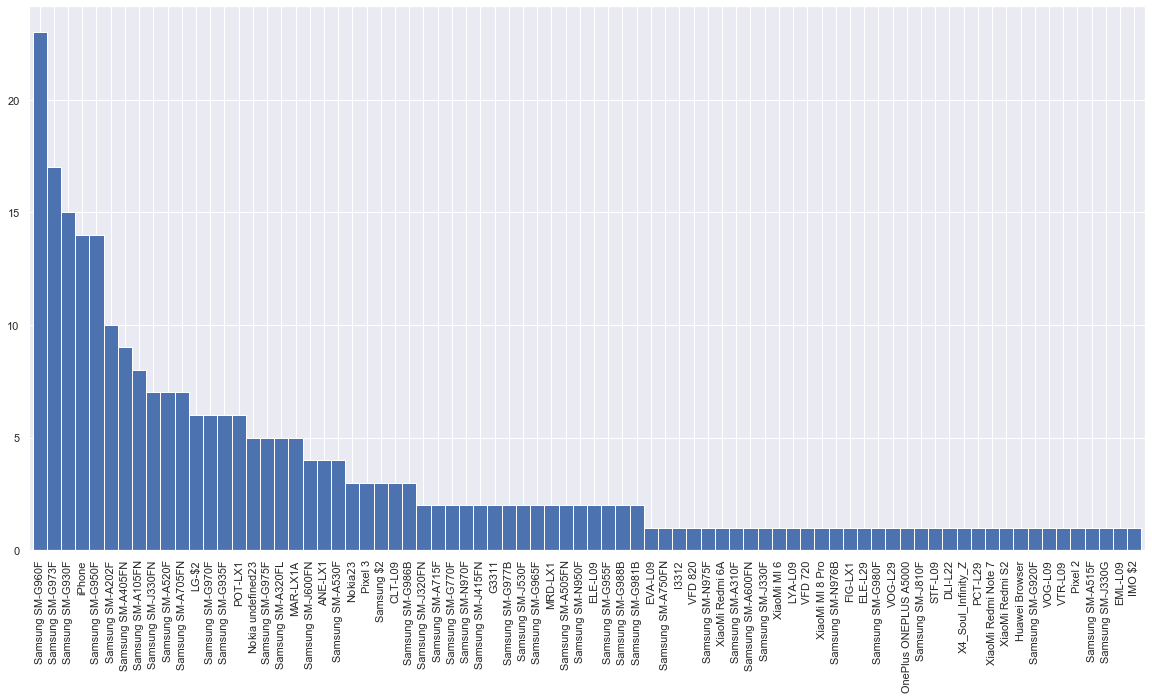

In [16]:
b=df_control_clean[df_control_clean['device_make']!='Generic Smartphone']
b['device_make'].value_counts().plot(kind='bar', width=1,figsize=(20,10))

In [17]:
clicks_cont=df_control_clean.count
clicks_cont()


auction_id     586
experiment     586
date           586
hour           586
device_make    586
platform_os    586
browser        586
yes            586
no             586
dtype: int64

In [18]:
clicks_exp=df_exposed_clean.count
clicks_exp()

auction_id     657
experiment     657
date           657
hour           657
device_make    657
platform_os    657
browser        657
yes            657
no             657
dtype: int64

In [19]:
df_control_clean['yes'].value_counts().nlargest(10)

0    322
1    264
Name: yes, dtype: int64

In [20]:
num_a, num_b = 589, 657
click_a, click_b = 264, 308
rate_a, rate_b = click_a / num_a, click_b / num_b

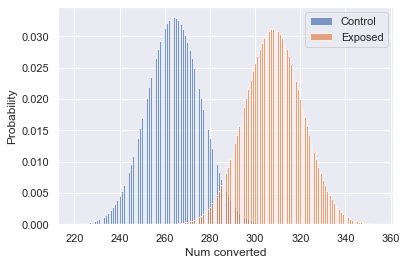

In [21]:
# Determine the probability of having x number of click throughs
clicks = np.arange(220, 355)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="Control", alpha=0.7)
plt.bar(clicks, prob_b, label="Exposed", alpha=0.7)
plt.legend()
plt.xlabel("Num converted"); plt.ylabel("Probability");

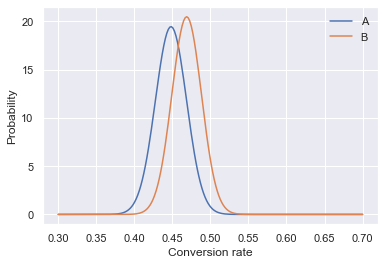

In [22]:


# Where does this come from? See the link above.
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0.3, 0.7, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

zscore is 0.728, with p-value 0.233


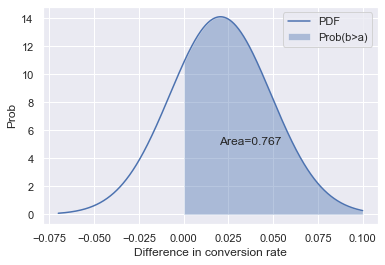

In [23]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.07, 0.1, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.4)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")